In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import pandas as pd

In [189]:
from lib.FastaAnalyzer import FastaAnalyzer
from lib.SequenceMethods import SequenceMethods
from lib.GENRE import GENRE
from lib.RFacade import RFacade

In [191]:
def get_bZIP_roc_auc(df, groupby='annot.short'):
    genome_path = '/mnt/znas/icb_zstore01/groups/ml01/datasets/annotations/mm10/genome/mm10.fa'
    fa_path = 'test.fa'
    
    res = []
    for annot_k, grp in df.groupby('annot.short'):
        fa = FastaAnalyzer.get_sequences_from_bed(grp[['CHR', 'START', 'END', 'k']], genome='mm10',
                                                  genome_path=genome_path, log=False)
        seqs = [s[1] for s in fa]

        import random
        random.seed(500)

        fg = [s.upper() for s in seqs]
        bg = [SequenceMethods.randomize_sequence(s) for s in fg]

        kmers_by_module = GENRE.get_kmers_by_module(kmers_dir='.')
        bzip_kmers = kmers_by_module['bZIP']

        fg_scores = [sum([kmer in s for kmer in bzip_kmers]) for s in fg]
        bg_scores = [sum([kmer in s for kmer in bzip_kmers]) for s in bg]

        import numpy as np
        from sklearn.metrics import roc_auc_score

        len(fg_scores), len(bg_scores)

        y_score = np.array(list(fg_scores) + list(bg_scores))
        y_true = np.concatenate([np.repeat(1, len(fg_scores)), np.repeat(0, len(bg_scores))])

        roc_auc = roc_auc_score(y_true, y_score)
        pval = RFacade.get_wilcox_test_pval(fg_scores, bg_scores)
        res.append([annot_k, len(fg_scores), len(bg_scores), roc_auc, pval])
    return res

In [138]:
from os.path import join
from os import listdir

In [214]:
res = []
for t in ['KCl_1h', 'bdnf_1h', 'KCl_6h', 'bdnf_6h', 'KCl_10h', 'bdnf_10h']:
    df = pd.read_csv('../data/atac_loess_comparisons/extend_0_trimmed_pooledpeaks/%s.tsv.gz' % t, sep='\t')
    df['k'] = df['CHR'] + ':' + df['START'].astype(int).astype(str) + '-' + df['END'].astype(int).astype(str)
    sel = df[(df['log2FoldChange'] > 0) & (df['padj'] < .1)]
    
    atac_dir = '../data/atac_loess_comparisons/extend_0_trimmed_pooledpeaks'
    annot = pd.concat([pd.read_csv(join(atac_dir, f), sep='\t') for f in listdir(atac_dir) if 'gained.peakAnnotations' in f and t in f])
    annot['k'] = annot['Chr'] + ':' + (annot['Start'] - 1).astype(int).astype(str) + '-' + annot['End'].astype(int).astype(str)
    annot['annot.short'] = annot['Annotation'].str.split(' \(').str[0]
    
    sel['annot.short'] = sel['k'].map(annot.set_index('k')['annot.short'].to_dict())
    df2 = pd.DataFrame(get_bZIP_roc_auc(sel, groupby='annot.short'))
    df2.columns = ['annot', 'n.fg', 'n.bg', 'roc.auc', 'p.val']
    df2['treatment'] = t
    res.append(df2)

res = pd.concat(res)
res['p.adj'] = RFacade.get_bh_pvalues(res['p.val'])

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


dataframe saved at (path/abspath)...
/tmp/tmpdb6r0akw
/tmp/tmpdb6r0akw
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpgr_g3lex
/tmp/tmpgr_g3lex
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpjfxvq0m3
/tmp/tmpjfxvq0m3
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp4yzdztxc
/tmp/tmp4yzdztxc
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpw0werzbc
/tmp/tmpw0werzbc
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp8w0rnlgh
/tmp/tmp8w0rnlgh
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpxvjr09if
/tmp/tmpxvjr09if
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpyycjp0ho
/tmp/tmpyycjp0ho
directory to check .


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


dataframe saved at (path/abspath)...
/tmp/tmpimif95x9
/tmp/tmpimif95x9
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp85n59ciz
/tmp/tmp85n59ciz
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpy963nk_v
/tmp/tmpy963nk_v
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpcdqvrb3x
/tmp/tmpcdqvrb3x
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpg_1bz4qm
/tmp/tmpg_1bz4qm
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpw8p2a7ia
/tmp/tmpw8p2a7ia
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpyk1z3m9t
/tmp/tmpyk1z3m9t
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpep7vyn5m
/tmp/tmpep7vyn5m
directory to check .


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


dataframe saved at (path/abspath)...
/tmp/tmpp2ha43_y
/tmp/tmpp2ha43_y
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpe_au26g4
/tmp/tmpe_au26g4
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpqnsocwro
/tmp/tmpqnsocwro
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpmyg3m4_k
/tmp/tmpmyg3m4_k
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpheuz9lyg
/tmp/tmpheuz9lyg
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp3xq9gb3n
/tmp/tmp3xq9gb3n
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp6tk_adxp
/tmp/tmp6tk_adxp
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpo8pis5_v
/tmp/tmpo8pis5_v
directory to check .


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


dataframe saved at (path/abspath)...
/tmp/tmpqpxiadhf
/tmp/tmpqpxiadhf
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpu6a0tb07
/tmp/tmpu6a0tb07
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp7rz8uuvm
/tmp/tmp7rz8uuvm
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpknonk631
/tmp/tmpknonk631
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpvc8nw2ne
/tmp/tmpvc8nw2ne
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpobnicxcv
/tmp/tmpobnicxcv
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp9lk6lcen
/tmp/tmp9lk6lcen
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp44bqzuc1
/tmp/tmp44bqzuc1
directory to check .


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


dataframe saved at (path/abspath)...
/tmp/tmpqgi02t7c
/tmp/tmpqgi02t7c
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp0ep3h7sc
/tmp/tmp0ep3h7sc
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpa8it2y72
/tmp/tmpa8it2y72
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp8v1dvzhe
/tmp/tmp8v1dvzhe
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmptill6ygd
/tmp/tmptill6ygd
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpe80tqxa_
/tmp/tmpe80tqxa_
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp93kgfhf4
/tmp/tmp93kgfhf4
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmph2tg58pg
/tmp/tmph2tg58pg
directory to check .


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


dataframe saved at (path/abspath)...
/tmp/tmpvicywapc
/tmp/tmpvicywapc
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpnhvotcal
/tmp/tmpnhvotcal
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpxxuf9v0e
/tmp/tmpxxuf9v0e
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpqnhrlevf
/tmp/tmpqnhrlevf
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpgc_6h_l1
/tmp/tmpgc_6h_l1
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp2_ddp0xv
/tmp/tmp2_ddp0xv
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmpwsj2w3e4
/tmp/tmpwsj2w3e4
directory to check .
dataframe saved at (path/abspath)...
/tmp/tmp2go5u7qg
/tmp/tmp2go5u7qg
directory to check .


In [215]:
res['sig'] = res['p.adj'] < 0.01

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 7, 5
rcParams['figure.dpi'] = 110

In [216]:
res['k'] = res['n.fg'].astype(str) +  np.where(res['sig'], '*', '').astype(str)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'KCl_1h'),
  Text(1.5, 0, 'KCl_6h'),
  Text(2.5, 0, 'KCl_10h'),
  Text(3.5, 0, 'bdnf_1h'),
  Text(4.5, 0, 'bdnf_6h'),
  Text(5.5, 0, 'bdnf_10h')])

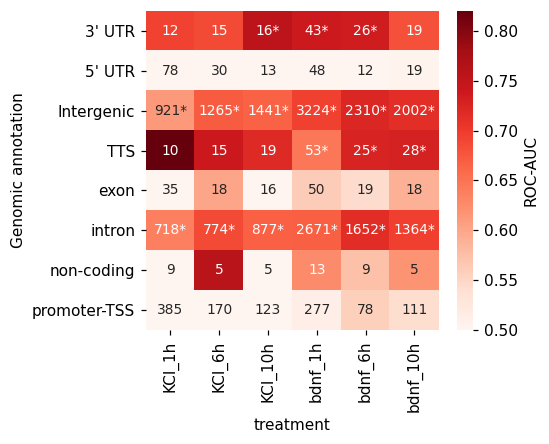

In [221]:
hm = res.pivot('annot', 'treatment', 'roc.auc')[[t + '_' + time for t in ['KCl', 'bdnf'] for time in ['1h', '6h', '10h']]]
annot = res.pivot('annot', 'treatment', 'k')[[t + '_' + time for t in ['KCl', 'bdnf'] for time in ['1h', '6h', '10h']]]

sns.heatmap(hm, cmap='Reds', vmin=.5, cbar_kws={'label': 'ROC-AUC'}, annot=annot, fmt='',
           annot_kws={'fontsize': 9})
plt.subplots_adjust(bottom=.3, right=.6)
plt.ylabel('Genomic annotation')
plt.xticks(rotation=90)